In [1]:
# Imports
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
# Getting the dataset
from sklearn.datasets import fetch_openml
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = X/255.

c:\Users\Serena\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Let's see some information about the dataset!

In [3]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int32

In [6]:
# Visualizing the images
def plot_digits(iter = 10):
    
    fig, axs = plt.subplots(10,iter)
    
    for digit in range(10):
        for x in range(iter):
            digit_index = y[y == digit].index[x]

            digit_pixels = np.array(X.iloc[digit_index]).reshape(28, 28)
            axs[digit,x].imshow(digit_pixels)
            axs[digit,x].axis('off')

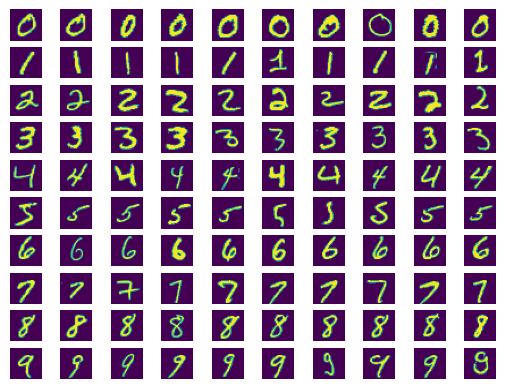

In [7]:
plot_digits()

<Axes: xlabel='class'>

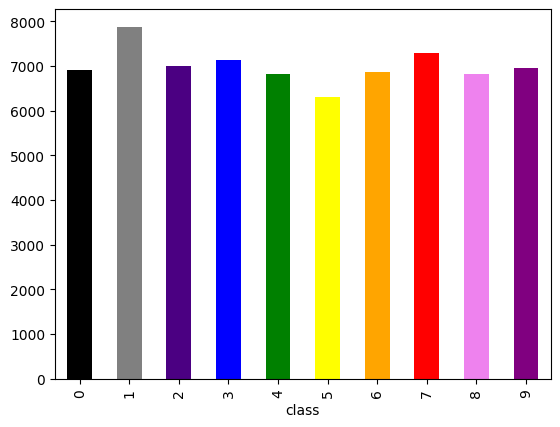

In [8]:
# Visualising the distribution of the labels
y.value_counts().sort_index().plot.bar(color = ['black', 'grey', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red', 'violet', 'purple'])

In [9]:
# Reducing the size of the dataset in order to speed up the computations
X, X_ignore, y, y_ignore = train_test_split(X, y, train_size = 0.20, random_state = 42, stratify = y)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (14000, 784)
y shape:  (14000,)


In [10]:
# Transforming each DataFrame in a csv file
X.to_csv(r'X.csv',index = False)
y.to_csv(r'y.csv',index = False)

Let's plot in 2 dimensions the points of the just created dataframe!

In [12]:
# Computing Pricipal Component Analysis
pca = PCA(n_components = 2)
print("Computing PCA with ", 2," components ...")
X_pca = pca.fit_transform(X)

Computing PCA with  2  components ...


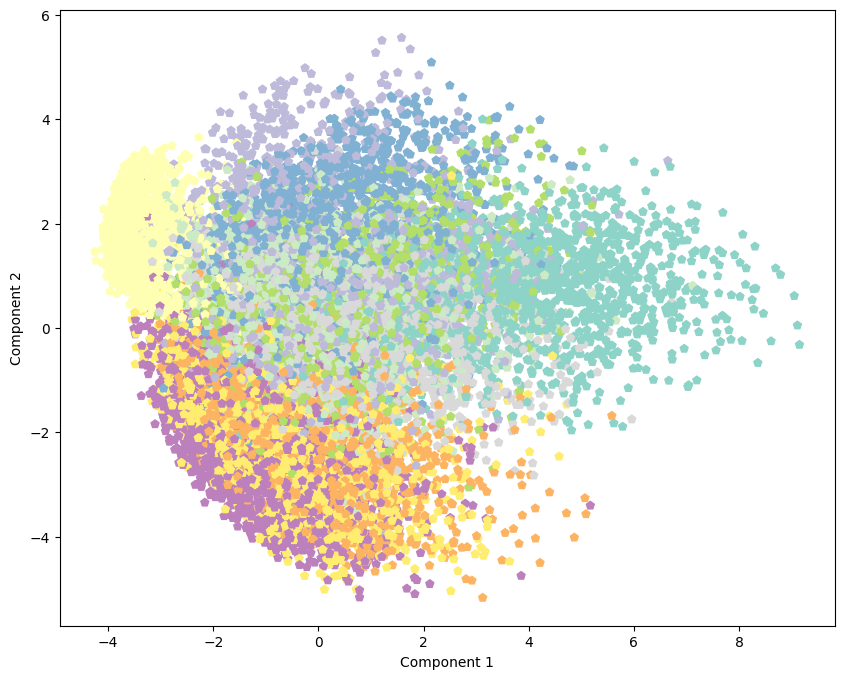

In [13]:
# Plot of the given data with PCA of 2 dimensions
plt.figure(figsize = (10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker = "p", c = y, cmap = "Set3")
plt.ylabel("Component 2")
plt.xlabel("Component 1")
plt.show()